In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
# Documentation on the datasets
# https://mtgjson.com/documentation.html

df_cards = pd.read_json('../datasets/AllCards.json')
df_sets = pd.read_json('../datasets/AllSets.json')

In [61]:
dfct = df_cards.transpose()
print(dfct.dtypes)
dfct.head()

cmc              object
colorIdentity    object
colors           object
hand             object
imageName        object
layout           object
life             object
loyalty          object
manaCost         object
name             object
names            object
power            object
starter          object
subtypes         object
supertypes       object
text             object
toughness        object
type             object
types            object
dtype: object


,cmc,colorIdentity,colors,hand,imageName,layout,life,loyalty,manaCost,name,names,power,starter,subtypes,supertypes,text,toughness,type,types
"""Ach! Hans, Run!""",6,"[R, G]","[Red, Green]",NaN,"ach! hans, run!",normal,NaN,NaN,{2}{R}{R}{G}{G},"""Ach! Hans, Run!""",NaN,NaN,NaN,NaN,NaN,"At the beginning of your upkeep, you may say ""...",NaN,Enchantment,[Enchantment]
1996 World Champion,5,"[W, U, B, R, G]","[White, Blue, Black, Red, Green]",NaN,world champion,normal,NaN,NaN,{W}{U}{B}{R}{G},1996 World Champion,NaN,*,NaN,[Legend],NaN,Cannot be the targets of spells or effects. Wo...,*,Summon — Legend,[Creature]
A Display of My Dark Power,0,NaN,NaN,NaN,a display of my dark power,scheme,NaN,NaN,NaN,A Display of My Dark Power,NaN,NaN,NaN,NaN,NaN,"When you set this scheme in motion, until your...",NaN,Scheme,[Scheme]
A Reckoning Approaches,0,NaN,NaN,NaN,a reckoning approaches,scheme,NaN,NaN,NaN,A Reckoning Approaches,NaN,NaN,NaN,NaN,NaN,"When you set this scheme in motion, look at th...",NaN,Scheme,[Scheme]
AWOL,3,[W],[White],NaN,awol,normal,NaN,NaN,{2}{W},AWOL,NaN,NaN,NaN,NaN,NaN,Remove target attacking creature from the game...,NaN,Instant,[Instant]


In [69]:
#dfct.apply(pd.to_numeric, errors='ignore')

dfct[['cmc', 'power', 'toughness']] = dfct[['cmc', 'power', 'toughness']].apply(pd.to_numeric)

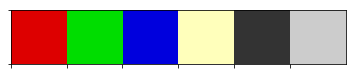

In [129]:
mtg_colors = ["#dd0000", "#00dd00", "#0000dd", "#ffffbb", "#333333", "#cccccc"]
sns.palplot(sns.color_palette(mtg_colors))

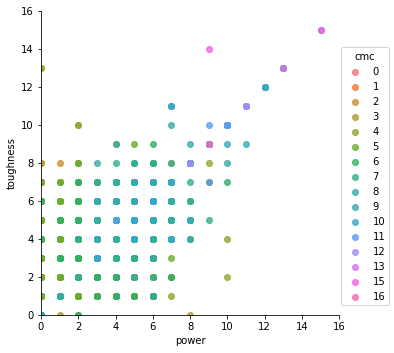

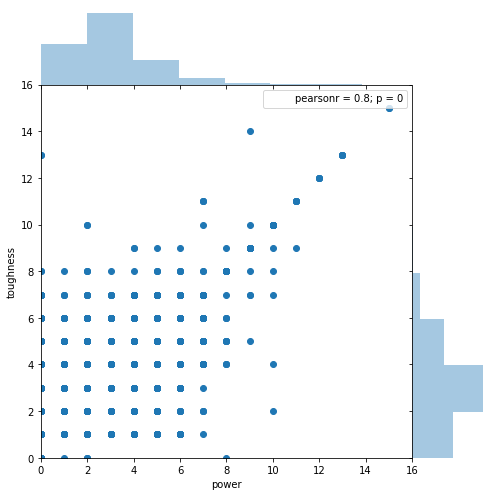

In [146]:


sns.lmplot(x='power',
           y='toughness',
           data=dfct,
           fit_reg=False, 
           hue='cmc').set(xlim=(0, 16), ylim=(0, 16))

sns.jointplot(x='power',
              y='toughness',
              data=dfct,
              kind="scatter",
              size=7,
              space=0,
              xlim=(0,16), ylim=(0,16))

# plt.scatter(x=dfct['power'],
#             y=dfct['toughness'],
#             s=dfct['cmc'],
#             c=dfct['cmc'],
#             alpha=0.75)
# plt.xlim(0, 16)
# plt.ylim(0, 16)
# plt.show()

In [116]:
dfst = df_sets.transpose()
print(dfst.dtypes)
dfst.head()

alternativeNames      object
block                 object
booster               object
border                object
cards                 object
code                  object
gathererCode          object
magicCardsInfoCode    object
magicRaritiesCodes    object
mkm_id                object
mkm_name              object
name                  object
oldCode               object
onlineOnly            object
releaseDate           object
translations          object
type                  object
dtype: object


,alternativeNames,block,booster,border,cards,code,gathererCode,magicCardsInfoCode,magicRaritiesCodes,mkm_id,mkm_name,name,oldCode,onlineOnly,releaseDate,translations,type
10E,NaN,NaN,"[rare, uncommon, uncommon, uncommon, common, c...",black,"[{'artist': 'Pete Venters', 'cmc': 7, 'colorId...",10E,NaN,10e,NaN,74,Tenth Edition,Tenth Edition,NaN,NaN,2007-07-13,"{'de': 'Zehnte Edition', 'fr': 'Dixième éditio...",core
2ED,NaN,NaN,"[rare, uncommon, uncommon, uncommon, common, c...",white,"[{'artist': 'Amy Weber', 'cmc': 2, 'id': '89b6...",2ED,2U,un,NaN,3,Unlimited,Unlimited Edition,NaN,NaN,1993-12-01,NaN,core
3ED,NaN,NaN,"[rare, uncommon, uncommon, uncommon, common, c...",white,"[{'artist': 'Mark Tedin', 'cmc': 10, 'id': 'ce...",3ED,3E,rv,NaN,6,Revised,Revised Edition,NaN,NaN,1994-04-01,"{'de': 'Unlimitierte Auflage', 'fr': 'Tirage N...",core
4ED,NaN,NaN,"[rare, uncommon, uncommon, uncommon, common, c...",white,"[{'artist': 'Mark Tedin', 'cmc': 10, 'id': '1a...",4ED,4E,4e,NaN,10,Fourth Edition,Fourth Edition,NaN,NaN,1995-04-01,"{'de': 'Vierte Edition', 'fr': 'Quatrième Edit...",core
5DN,NaN,Mirrodin,"[rare, uncommon, uncommon, uncommon, common, c...",black,"[{'artist': 'John Matson', 'cmc': 4, 'colorIde...",5DN,NaN,5dn,NaN,47,Fifth Dawn,Fifth Dawn,NaN,NaN,2004-06-04,"{'de': 'Fünfte Morgenröte', 'fr': 'La Cinquièm...",expansion
